In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
confirmed = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovery = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [110]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/01/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,988,989,989,989,989,989,989,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,396,399,399,399,400,400,410,410,411,413
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,572,573,575,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,294,294,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [111]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/01/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,5,7,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [112]:
recovery.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/01/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,539,597,637,663,712,744,792,821,868,873
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,169,178,189,198,215,235,248,257,271,276
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,316,328,335,349,372,384,401,422,438,450
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,149,162,170,183,199,218,228,235,243,247
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,76,76,78,80,80,81,81,82,82,84


In [113]:
# data cleanup
confirmed = confirmed.drop(['Province/State','Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State','Lat', 'Long'], axis=1)
recovery = recovery.drop(['Province/State','Lat', 'Long'], axis=1)

In [114]:
confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/01/20
0,Mainland China,1,9,15,39,60,70,106,152,200,...,988,989,989,989,989,989,989,990,990,990
1,Mainland China,14,22,36,41,68,80,91,111,114,...,396,399,399,399,400,400,410,410,411,413
2,Mainland China,6,9,27,57,75,110,132,147,182,...,572,573,575,576,576,576,576,576,576,576
3,Mainland China,1,5,10,18,35,59,80,84,101,...,293,293,293,293,294,294,296,296,296,296
4,Mainland China,0,2,2,4,7,14,19,24,26,...,91,91,91,91,91,91,91,91,91,91


In [115]:
# group data by country
confirmed_groupby_country = confirmed.groupby(confirmed['Country/Region']).sum()
deaths_groupby_country = deaths.groupby(deaths['Country/Region']).sum()
recovery_groupby_country = recovery.groupby(recovery['Country/Region']).sum()
print(confirmed_groupby_country.index)
# aggregate data
aggregate_confirmed = confirmed_groupby_country.sum()
aggregate_deaths = deaths_groupby_country.sum()
aggregate_recovery = recovery_groupby_country.sum()

Index(['Afghanistan', 'Algeria', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium', 'Brazil', 'Cambodia',
       'Canada', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hong Kong', 'Iceland', 'India', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Macau', 'Mainland China', 'Malaysia', 'Mexico', 'Monaco',
       'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Others', 'Pakistan', 'Philippines', 'Qatar',
       'Romania', 'Russia', 'San Marino', 'Singapore', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'UK', 'US',
       'United Arab Emirates', 'Vietnam'],
      dtype='object', name='Country/Region')


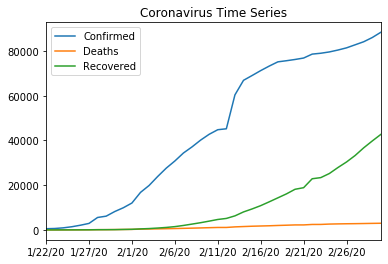

In [116]:
# plot aggregate data
ax = aggregate_confirmed.plot(legend=True, title='Coronavirus Time Series', label='Confirmed')
aggregate_deaths.plot(ax=ax, legend=True, label='Deaths')
aggregate_recovery.plot(ax=ax, legend=True, label='Recovered')

In [117]:
# calculating daily deltas
confirmed_daily_delta = (confirmed_groupby_country.iloc[:,-1] - confirmed_groupby_country.iloc[:,-2])/confirmed_groupby_country.iloc[:,-2]
deaths_daily_delta = (deaths_groupby_country.iloc[:,-1] - deaths_groupby_country.iloc[:,-2])/deaths_groupby_country.iloc[:,-2]
recovery_daily_delta = (recovery_groupby_country.iloc[:,-1] - recovery_groupby_country.iloc[:,-2])/recovery_groupby_country.iloc[:,-2]

# calculating weekly deltas
confirmed_weekly_delta = (confirmed_groupby_country.iloc[:,-1] - confirmed_groupby_country.iloc[:,-8])/confirmed_groupby_country.iloc[:,-8]
deaths_weekly_delta = (deaths_groupby_country.iloc[:,-1] - deaths_groupby_country.iloc[:,-8])/deaths_groupby_country.iloc[:,-8]
recovery_weekly_delta = (recovery_groupby_country.iloc[:,-1] - recovery_groupby_country.iloc[:,-8])/recovery_groupby_country.iloc[:,-8]

In [118]:
confirmed_history = pd.concat([confirmed_groupby_country.iloc[:,-8],
                               confirmed_groupby_country.iloc[:,-2],
                               confirmed_groupby_country.iloc[:,-1]],
                              axis=1)
deaths_history = pd.concat([deaths_groupby_country.iloc[:,-8],
                            deaths_groupby_country.iloc[:,-2],
                            deaths_groupby_country.iloc[:,-1]],
                            axis=1)
recovery_history = pd.concat([recovery_groupby_country.iloc[:,-8],
                              recovery_groupby_country.iloc[:,-2],
                              recovery_groupby_country.iloc[:,-1]],
                             axis=1)


# combine deltas and history
confirmed_delta_df = pd.concat([confirmed_history, 
                                confirmed_daily_delta, 
                                confirmed_weekly_delta],
                               axis=1).rename(columns={0: 'Daily Delta', 1: 'Weekly Delta'})
deaths_delta_df = pd.concat([deaths_history, 
                                deaths_daily_delta, 
                                deaths_weekly_delta],
                               axis=1).rename(columns={0: 'Daily Delta', 1: 'Weekly Delta'})
recovery_delta_df = pd.concat([recovery_history, 
                                recovery_daily_delta, 
                                recovery_weekly_delta],
                               axis=1).rename(columns={0: 'Daily Delta', 1: 'Weekly Delta'})

confirmed_delta_df.replace([np.inf], 'n/a', inplace=True)
print(confirmed_delta_df)





# create deltas dataframe
deltas = {'Daily Delta': [confirmed_daily_delta, deaths_daily_delta, recovery_daily_delta], 
          'Weekly Delta': [confirmed_weekly_delta, deaths_weekly_delta, recovery_weekly_delta]}
delta_df = pd.DataFrame(data=deltas, index=['Confirmed', 'Deaths', 'Recovered'])
delta_df

          Country/Region  2/23/20  2/29/20  3/01/20
0            Afghanistan        0        1        1
1                Algeria        0        1        1
2                Armenia        0        0        1
3              Australia       22       25       27
4                Austria        0        9       14
..                   ...      ...      ...      ...
63              Thailand       35       42       42
64                    UK        9       23       36
65                    US       35       70       76
66  United Arab Emirates       13       21       21
67               Vietnam       16       16       16

[68 rows x 4 columns]
                     Country/Region  2/23/20  2/29/20  3/01/20 Daily Delta  \
0                       Afghanistan      0.0      1.0      1.0         NaN   
1                           Algeria      0.0      1.0      1.0         NaN   
2                           Armenia      0.0      0.0      1.0         NaN   
3                         Australia     2

,Daily Delta,Weekly Delta
Confirmed,Country/Region Afghanistan 0.00000...,Country/Region Afghanistan in...
Deaths,Country/Region Afghanistan NaN Alg...,Country/Region Afghanistan NaN Alg...
Recovered,Country/Region Afghanistan NaN Alg...,Country/Region Afghanistan Na...


In [119]:
# convert to percentage for easy understanding
delta_df_percent = (delta_df * 100).astype(str) + '%'
delta_df_percent

,Daily Delta,Weekly Delta
Confirmed,Country/Region\nAfghanistan 0.000...,Country/Region\nAfghanistan ...
Deaths,Country/Region\nAfghanistan NaN\nA...,Country/Region\nAfghanistan NaN\nA...
Recovered,Country/Region\nAfghanistan NaN\nA...,Country/Region\nAfghanistan ...
